# Import the necessary libraries:

In [1]:
import cv2
import matplotlib.pyplot as plt

# Now to upload the image:

In [4]:
img=cv2.imread('yassir4.jpg')

# To view the image:

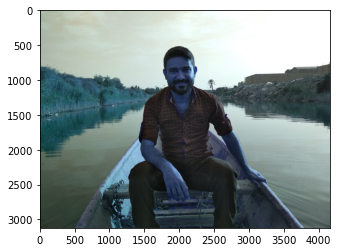

In [5]:
plt.imshow(img)

# The image's color is not proper because in cv2 it reads image as Blue Green Red, not Red Green Blue, to correct that:

In [6]:
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

# Now to view it:

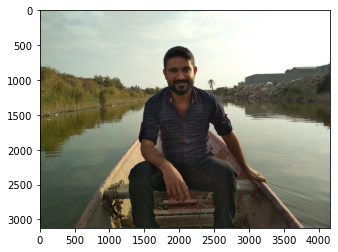

In [7]:
plt.imshow(img)

# To view image as HSV:

In [8]:
hsv_img=cv2.cvtColor(img,cv2.COLOR_RGB2HSV)

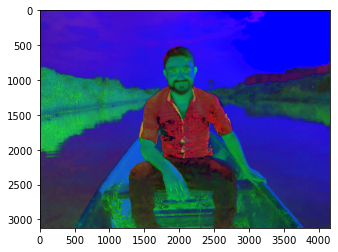

In [9]:
plt.imshow(hsv_img)

# To view it as HLS:

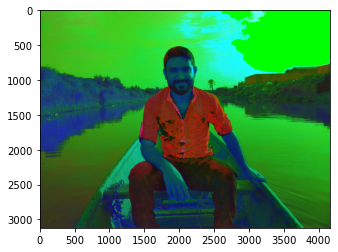

In [10]:
hls_img=cv2.cvtColor(img,cv2.COLOR_RGB2HLS)
plt.imshow(hls_img)

# Now let's read it and correct the colors again:

In [18]:
img1=cv2.imread('yassir4.jpg')

In [19]:
img1=cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)

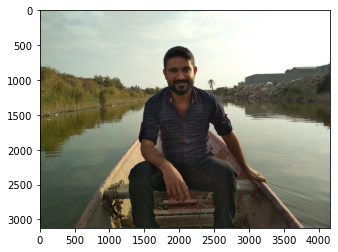

In [20]:
plt.imshow(img1)

# To view the image's shape, it reads as col,row,channels:

In [21]:
img1.shape

(3120, 4160, 3)

# Now let's read the no_copy image:

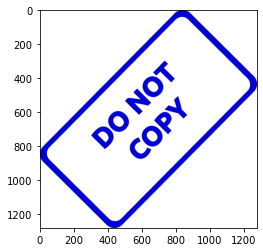

In [22]:
img2=cv2.imread('no_copy.png')
plt.imshow(img2)

# Also to correct the color views:

In [23]:
img2=cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

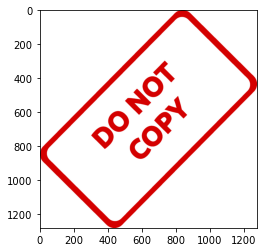

In [24]:
plt.imshow(img2)

# To view the image shape:

In [25]:
img2.shape

(1280, 1277, 3)

# First type of blending is that to make both images same size:

In [26]:
img1=cv2.resize(img1,(1200,1200))
img2=cv2.resize(img2,(1200,1200))

# Now let's view the first image, we notice that the image is squeezed:

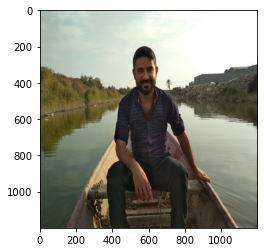

In [27]:
plt.imshow(img1)

# Now let's view the second image or img2:

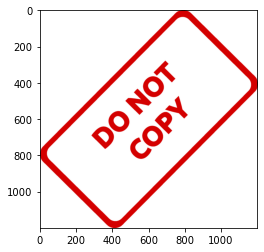

In [28]:
plt.imshow(img2)

# Now the images are ready to blend them:

In [29]:
blended=cv2.addWeighted(src1=img1,alpha=0.7,src2=img2,beta=0.3,gamma=0)

# To view the blended images:

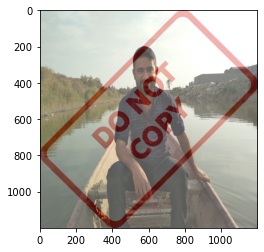

In [30]:
plt.imshow(blended)

# There is another way of blending images when both size are different, let's read images again with their origional size:

In [31]:
img1=cv2.imread('yassir4.jpg')
img1=cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)

In [32]:
img2=cv2.imread('no_copy.png')
img2=cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

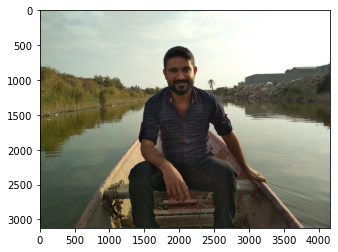

In [33]:
plt.imshow(img1)

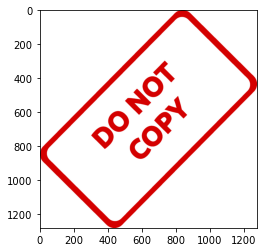

In [34]:
plt.imshow(img2)

# Let's resize the second image only:

In [35]:
img2=cv2.resize(img2,(1200,1200))

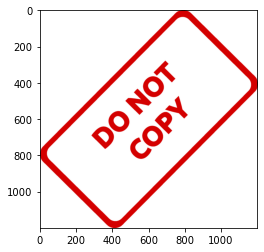

In [36]:
plt.imshow(img2)

# Now let's create 2 variables,each one contains an image like the following:

In [37]:
large_img=img1
small_img=img2

# Also let's create 2 variables,both r equal to 0,one for x and the other for y:

In [38]:
x_offset=0
y_offset=0

# Now let's create x_end & y_end:

In [39]:
x_end=x_offset+small_img.shape[1]
y_end=y_offset+small_img.shape[0]

# Le's check the shape of the small_img:

In [40]:
small_img.shape

(1200, 1200, 3)

# Now let's blend the large image with the small image:

In [41]:
large_img[y_offset:y_end,x_offset:x_end]=small_img

# Now let's view the blended image, or large_img:

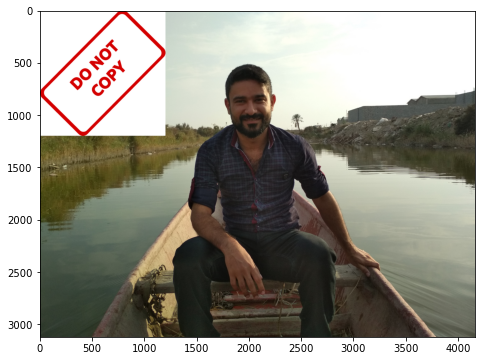

In [42]:
plt.figure(figsize=(8,6))
plt.imshow(large_img)

# Another way to blend images, first, let's reload the image and correct the colors:

In [43]:
img1=cv2.imread('yassir4.jpg')
img1=cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)

In [44]:
img2=cv2.imread('no_copy.png')
img2=cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

In [45]:
img1.shape

(3120, 4160, 3)

# Now let's resize the no copy image or img2:

In [46]:
img2=cv2.resize(img2,(1200,1200))

# Now let's subtract height and width of img1 with img2:

In [47]:
x_offset=4160-1200

In [48]:
y_offset=3120-1200

# Let's check the shape of img2 after resizing:

In [49]:
img2.shape

(1200, 1200, 3)

# Now let's get a part of img1 same size of img2, let's take it from bottom right side and view it:

In [50]:
br_img=img1[y_offset:3120,x_offset:4160]

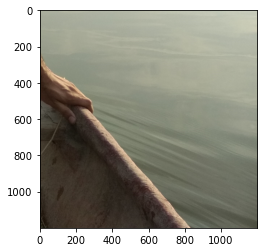

In [51]:
plt.imshow(br_img)

# Let's convert the img2 to gray style:

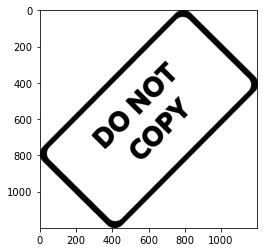

In [52]:
img2gray=cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY)
plt.imshow(img2gray,cmap='gray')

# Now let's inverse the colors:

In [53]:
mask_inv=cv2.bitwise_not(img2gray)

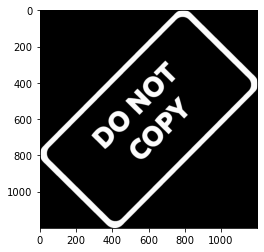

In [54]:
plt.imshow(mask_inv,cmap='gray')

# Now let's view the mask_inv's shape:

In [55]:
mask_inv.shape

(1200, 1200)

# We see here it's 2D, we should make it 3D:

In [56]:
import numpy as np

In [57]:
white_background=np.full(img2.shape,255,dtype=np.uint8)

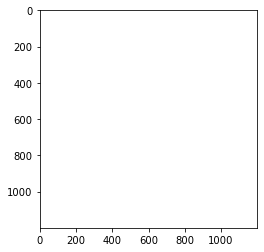

In [58]:
plt.imshow(white_background)

# To view the the shape of white_background:

In [59]:
white_background.shape

(1200, 1200, 3)

# Now let's put the inv_mask on white_background:

In [60]:
bk=cv2.bitwise_or(white_background,white_background,mask=mask_inv)

In [61]:
bk.shape

(1200, 1200, 3)

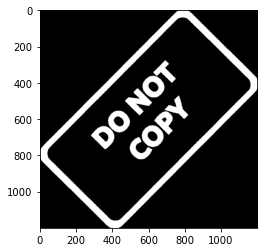

In [62]:
plt.imshow(bk)

# Now let's do for the foreground:

In [63]:
fg=cv2.bitwise_or(img2,img2,mask=mask_inv)

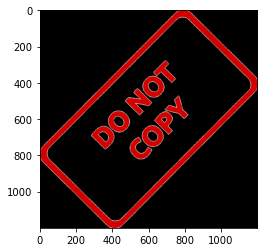

In [64]:
plt.imshow(fg)

# Now let's add br_img to the fg:

In [65]:
final_br=cv2.bitwise_or(br_img,fg)

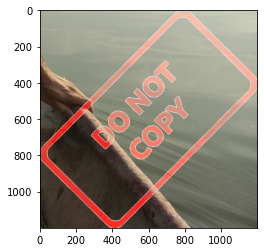

In [66]:
plt.imshow(final_br)

# Let's create 2 variables , one is large_img for the img1 and small_img for final_br:

In [67]:
large_img=img1
small_img=final_br

# Now it's the time to blend the small_img with the large_img:

In [68]:
large_img[y_offset:y_offset+small_img.shape[0],x_offset:x_offset+small_img.shape[1]]=small_img

# Now let's view the large_img:

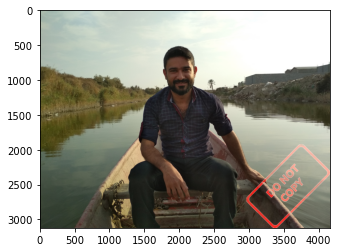

In [69]:
plt.imshow(large_img)